# Writer independent signature verification task with a convolutional Siamese network.

Problem Statement
Signature is one of the most popular and commonly accepted biometric hallmarks that has been used since the ancient times for verifying different entities related to human beings, viz. documents, forms, bank checks, individuals, etc. Therefore, signature verification is a critical task and many efforts have been made to remove the uncertainty involved in the manual authentication procedure, which makes signature verification an important research line in the field of machine learning and pattern recognition.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Import Neccessary Library

In [2]:
import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile
import pandas as pd


import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from keras import models

from tensorflow.keras.layers import Layer
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [3]:
#pip install tensorflow==2.8

# Extracting Dataset File

In [4]:
with ZipFile('/gdrive/MyDrive/Vivek/Signature Verification/Dataset/BHSig260.zip') as z:
    z.extractall()

In [5]:
path='/content/BHSig260/Hindi'
path

'/content/BHSig260/Hindi'

In [6]:
# Get the list of all directories and sort them
dir_list = next(os.walk(path))[1]
dir_list.sort()

In [7]:
dir_list

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',


<ul><li>For each person segregate the genuine signatures from the forged signatures.</li>
<li>Genuine signatures are stored in the list "orig_groups".</li>
<li>Forged signatures are stored in the list "forged_groups"</li></ul>

In [8]:
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path+'/'+directory)
    images.sort()
    images = [path+'/'+directory+'/'+x for x in images]
    forg_groups.append(images[:30])
    # First 30 signatures in each folder are forrged
    
    orig_groups.append(images[30:])
    # Next 24 signatures are genuine

In [9]:
#orignal signature
orig_groups[1]

['/content/BHSig260/Hindi/002/H-S-2-G-01.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-02.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-03.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-04.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-05.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-06.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-07.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-08.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-09.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-10.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-11.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-12.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-13.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-14.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-15.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-16.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-17.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-18.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-19.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-20.tif',
 '/content/BHSig260/Hindi/002/H-S-2-G-21.tif',
 '/content/BH

In [10]:
# forrge signature
forg_groups[1]

['/content/BHSig260/Hindi/002/H-S-2-F-01.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-02.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-03.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-04.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-05.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-06.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-07.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-08.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-09.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-10.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-11.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-12.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-13.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-14.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-15.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-16.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-17.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-18.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-19.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-20.tif',
 '/content/BHSig260/Hindi/002/H-S-2-F-21.tif',
 '/content/BH

In [11]:
#length of both list
len(orig_groups), len(forg_groups)

(160, 160)

In [12]:
#checking 24 signature in original list
orig_length = [len(x) for x in orig_groups]

#checking 30 signature in forrge list
forg_length = [len(x) for x in forg_groups]

In [13]:
print('Orignal length\n',orig_length, '\n\nForrge length\n',forg_length)

Orignal length
 [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24] 

Forrge length
 [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3

# Train and Test Split
<ul>
<li>Signatures of 120 people are used for training.</li>
<li>Signatures of 20 people are used for validation.</li>
<li>Signatures of 20 people are used for testing.</li>
</ul>

In [14]:
orig_train, orig_val, orig_test = orig_groups[:120], orig_groups[120:140], orig_groups[140:]
forg_train, forg_val, forg_test = forg_groups[:120], forg_groups[120:140], forg_groups[140:]

In [15]:
del orig_groups, forg_groups

In [16]:
#Height of image
img_hgt = 155

#Width of image
img_wdt = 220

In [17]:
len(orig_test)

20

# Signature Visulazaition

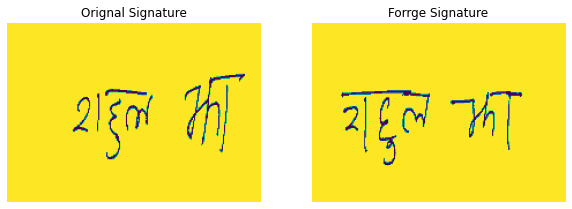

In [18]:
fig, (fig1,fig2) = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
k = np.random.randint(len(orig_train))

#Photo of orignal signature
img_org = random.sample(orig_train[k],1)
img_org = cv2.imread(img_org[0],0)
img_org = cv2.resize(img_org, (img_wdt, img_hgt))
fig1.set_title('Orignal Signature')
fig1.axis('off')
fig1.imshow(img_org)

#Photo of forrge signature
img_forg = random.sample(forg_train[k],1)
img_forg = cv2.imread(img_forg[0],0)
img_forg = cv2.resize(img_forg, (img_wdt, img_hgt))
fig2.set_title('Forrge Signature')
fig2.axis('off')
fig2.imshow(img_forg)

# Model Building
<ul>
    <li>Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
    <li>For every person we have 24 genuine signatures, hence we have 
    <li>24 choose 12,276=12 * 23 Genuine-Genuine image pairs for one person.
    <li>To make Genuine-Forged pairs, we pair every Genuine signature of a person
    <li>with 12 randomly sampled Forged signatures of the same person.
    <li>Thus we make 24 * 12 = 276 Genuine-Forged image pairs for one person.
    <li>In all we have 120 person's data in the training data.
    <li>24*23/2=276 
    <li>Total no. of Genuine-Genuine pairs = 120 * 276(24*23/2) = 33120
    <li>Total number of Genuine-Forged pairs = 120 * 288 (24*12) = 34560
    <li>Total no. of data points = 33120 + 34560 = 67680
</ul>

In [19]:
def generate_batch(orig_groups, forg_groups, batch_size = 32):
    '''Function to generate a batch of data with batch_size number of data points
    Half of the data points will be Genuine-Genuine pairs and half will be Genuine-Forged pairs'''
    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []
        
        for orig, forg in zip(orig_groups, forg_groups):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        #print(len(orig_pairs),len(forg_pairs))
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)
        
        # Note the lists above contain only the image names and
        # actual images are loaded and yielded below in batches
        # Below we prepare a batch of data points and yield the batch
        # In each batch we load "batch_size" number of image pairs
        # These images are then removed from the original set so that
        # they are not added again in the next batch.
            
        k = 0
        pairs=[np.zeros((batch_size, img_hgt, img_wdt, 1)) for i in range(2)]
        #print(pairs)
        targets=np.zeros((batch_size,))
        #print(targets)
        for ix, pair in enumerate(all_pairs):
            img1 = cv2.imread(pair[0], 0)
            img2 = cv2.imread(pair[1], 0)
            img1 = cv2.resize(img1, (img_wdt, img_hgt))
            img2 = cv2.resize(img2, (img_wdt, img_hgt))
            img1 = np.array(img1, dtype = np.float64)
            img2 = np.array(img2, dtype = np.float64)
            img1 /= 255
            img2 /= 255
            img1 = img1[..., np.newaxis]
            img2 = img2[..., np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]
            k += 1
            if k == batch_size:
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_hgt, img_wdt, 1)) for i in range(2)]
                targets=np.zeros((batch_size,))
        
    return pairs, targets

<ul><li>Euclidean distance is calculated as the square root of the sum of the squared differences between the two vectors.</li>
<li>It will give the difference between the points of orignal signature and forge signature.</li></ul>

In [20]:
def euclidean_distance(vects):
    '''Compute Euclidean Distance between two vectors'''
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [21]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

## Explanation:
When ytrue is 1, that means the sample are duplicates of each other, 
    so the Euclidean distance (ypred) between their outputs must be minimized.
    So the loss is taken as the square of that Euclidean distance itself - K.square(y_pred).
    When ytrue is 0, i.e. the samples are not duplicates, then the Euclidean distance 
    between them must be maximized, at least to the margin. So the loss to be minimized
    is the difference of the margin and the Euclidean distance - (margin - y_pred).
    If the Euclidean distance (ypred) is already greater than the margin, 
    then nothing is to be learned, so the loss is made to be zero in 
    that case by saying K.maximum(margin - y_pred, 0).

In [22]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))
def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

## CNN Siamese Network
The network takes a pair of images as input. The original image is sent to one CNN channel while the positive image (from the same scene class) or the negative one (from the different scene class) is sent to the other CNN channel simultaneously

In [23]:
def create_base_network_signet(input_shape):
    '''Base Siamese Network'''
    
    seq = Sequential()
    seq.add(Conv2D(96, kernel_size=(11, 11), activation='relu', name='conv1_1', strides=4, input_shape= input_shape))
    seq.add(BatchNormalization())
    seq.add(MaxPooling2D((2,2), strides=(1,1)))  
    seq.add(Dropout(0.3))
    #seq.add(ZeroPadding2D((2, 2)))
    
    seq.add(Conv2D(256, kernel_size=(5, 5), activation='relu', name='conv2_1'))
    seq.add(BatchNormalization())
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))
    #seq.add(ZeroPadding2D((1, 1)))
    
    seq.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv3_1'))
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))
    #seq.add(ZeroPadding2D((1, 1)))
    
    #seq.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv3_2'))    
    #seq.add(MaxPooling2D((2,2), strides=(1,1)))
    #seq.add(Dropout(0.3))
    #seq.add(Flatten(name='flatten'))
    seq.add(GlobalAveragePooling2D())
    seq.add(Dense(128, activation='relu'))
    return seq


In [24]:
input_shape=(img_hgt, img_wdt, 1)
input_shape

(155, 220, 1)

## Defining 2 different input to CNN model

In [25]:
# network definition
base_network = create_base_network_signet(input_shape)

input_a = Input(shape=(input_shape))
input_b = Input(shape=(input_shape))

# Weights will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Compute the Euclidean distance between the two vectors in the latent space
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model(inputs=[input_a, input_b], outputs=distance)

In [26]:
batch_sz = 128
num_train_samples = 276*120 + 24 * 12 *120
num_val_samples = num_test_samples = 276*20 + 288*20
num_train_samples, num_val_samples, num_test_samples

(67680, 11280, 11280)

In [27]:
# compile model using RMSProp Optimizer and Contrastive loss function defined above
rms = RMSprop(lr=1e-4)
model.compile(loss=contrastive_loss, optimizer=rms,metrics=[accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


<ul><li>Reduce the learning rate by a factor of 0.1 if the validation loss does not improve for 5 epochs
<li> Stop the training using early stopping if the validation loss does not improve for 12 epochs.</ul>

In [28]:
callbacks = [
    EarlyStopping(patience=3, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.000001, verbose=1),
    ModelCheckpoint('./signet.h5', verbose=1, save_weights_only=True)
]

In [29]:
#Fitting the CNN model
results = model.fit(generate_batch(orig_train, forg_train, batch_sz),
                              steps_per_epoch = num_train_samples//batch_sz,
                              epochs = 1,
                              validation_data = generate_batch(orig_val, forg_val, batch_sz),
                              validation_steps = num_val_samples//batch_sz,
                              callbacks = callbacks)

528/528 [==============================] - ETA: 0s - loss: 0.1092 - accuracy: 0.8779
Epoch 1: saving model to ./signet.h5
528/528 [==============================] - 341s 622ms/step - loss: 0.1092 - accuracy: 0.8779 - val_loss: 0.1258 - val_accuracy: 0.8480 - lr: 1.0000e-04


In [30]:
# import pickle
# filename = 'model.pkl'
# pickle.dump(results, open(filename, 'wb'))
#results.save_weights("model.h5")

# Prediction of Signature

In [31]:
model.save_weights('signet.h5')

In [32]:
model.load_weights('signet.h5')

In [44]:
model.save('model_1.h5')

In [42]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [ ]:
forg_test

In [ ]:
orig_test

In [35]:
# test_gen = generate_batch(img1,img2, 1)
# test_gen

In [36]:
org_img_path = '/content/BHSig260/Hindi/002/H-S-2-G-01.tif'
forg_img_path ='/content/BHSig260/Hindi/002/H-S-2-F-01.tif'

In [37]:
test_gen = generate_batch(org_img_path, forg_img_path, 1)
print("-----",org_img_path)

----- /content/BHSig260/Hindi/002/H-S-2-G-01.tif


--------test <generator object generate_batch at 0x7f7130128250>
----testpt---- [[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]]
----trainpt---- 1.0
======= [[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]]


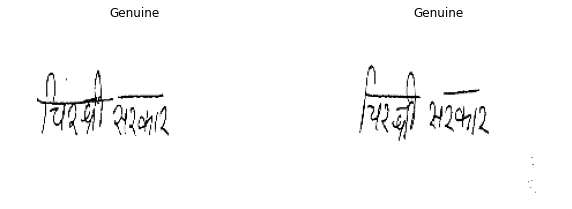

Difference Score =  0.32223836
Its a Genuine Signature


In [38]:
threshold=0.5
test_gen = generate_batch(orig_test, forg_test, 1)
print("--------test",test_gen)
def predict_score():
    '''Predict distance score and classify test images as Genuine or Forged'''
    test_point, test_label = next(test_gen)
    print("----testpt----",test_point[1])
    print("----trainpt----",test_label[0])

    img1, img2 = test_point[0], test_point[1]
    print("=======",img1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")


predict_score()


In [39]:
threshold=0.5
test_gen = generate_batch(orig_test, forg_test, 1)
def predict_score():
    '''Predict distance score and classify test images as Genuine or Forged'''
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")

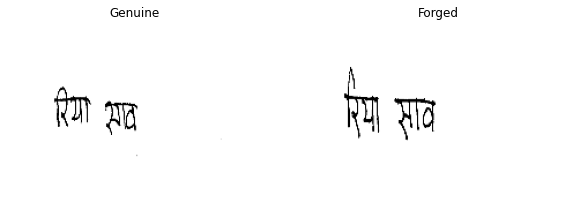

Difference Score =  0.53938985
Its a Forged Signature


In [40]:
predict_score()

In [41]:
Var1= 

SyntaxError: ignored

In [ ]:
pairs=[np.zeros((1, img_hgt, img_wdt, 1)) for i in range(2)]
#targets=np.zeros((batch_size,))
img2 = cv2.imread("/gdrive/MyDrive/Vivek/Signature Verification/Dataset/signature sample/forged_sign.jpg", 0)
img1 = cv2.imread("/gdrive/MyDrive/Vivek/Signature Verification/Dataset/signature sample/orginal_sign_1_1.jpg", 0)
img1 = cv2.resize(img1, (img_wdt, img_hgt))
img2 = cv2.resize(img2, (img_wdt, img_hgt))
img1 = np.array(img1, dtype = np.float64)
img2 = np.array(img2, dtype = np.float64)
img1 /= 255
img2 /= 255
img1 = img1[..., np.newaxis]
img2 = img2[..., np.newaxis]


pred, tr_y = [], []
tr_y = 1
model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])[0][0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(np.squeeze(img1), cmap='gray')
ax2.imshow(np.squeeze(img2), cmap='gray')
ax1.set_title('Genuine')
if tr_y == 1:
    ax2.set_title('Genuine')
else:
    ax2.set_title('Forged')
ax1.axis('off')
ax2.axis('off')
plt.show()
result = model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])
diff = result[0][0]
print("Difference Score = ", diff)
if diff > threshold:
    print("Its a Copied Signature")
else:
    print("Its a Orignal Signature")

In [ ]:
from platform import python_version


print("Current Python Version-", python_version())



In [45]:
from platform import python_version


print("Current Python Version-", python_version())

Current Python Version- 3.7.13
